# Assignment #4 - Reinforcement Learning

### <font color="red"> DUE: Apr 7 (Friday) 11:00 pm </font>  

<font color="blue"> Claire Ardern </font>

# I. Overview

There are two objectives included in this assignment. The first objective is to modify the provided 1D Marble Class to create a 2D Marble Class. Then, create an RL Agent to act on the environment using a neural network function approximator.  The second objective is to select a Gymnasium environment and fully explore it to learn how it functions. Then, another RL Agent will be created to act on this environment using a tabular function approximator. These objectives are completed by analyzing the code discussed in class in order to determine which modifications and methods need to be made to implement the desired agents in the desired environments.

# II. Problems 



## 2D Marble Control

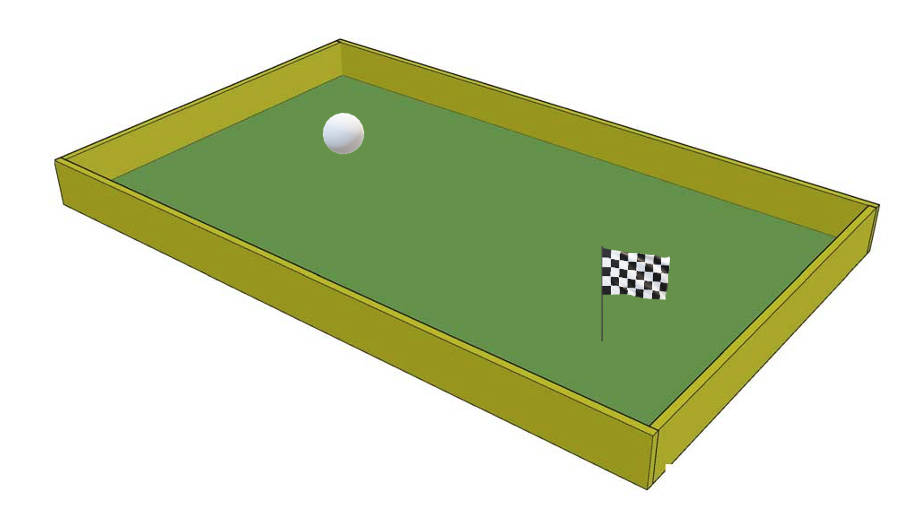

#### STEPS for 2D Marble

1. [II Problems] First, build 2D marble class by extending the Marble class from the class note. 
2. [II Problems] Explain the environment.
3. [III Methods] Build your own RLAgent class to solve the problem.
4. [III Methods] Explain your RLAgent (with a neural network function approximator)
5. [IV Results]  Discuss the results 


### 1. Build 2D marble class.

In [1]:
class Marble2D():
    """ 2d marble problem
        
        states: [x, dx, y, dy]
            x: x-coordinate location
            dx: x velocity
            y: y-coordinate location
            dy: y velocity
            
        action: [[0,0],[0,1],[0,-1],[1,0],[-1,0]]
            [0,0]: Do not move
            [0,1]: Move right
            [0,-1]: Move left
            [1,0]: Move up
            [-1,0]: Move down
 
         ____________________________________
        |                                    |
        |                                    |
        |                                    |
        |                            G       |
        |                                    |
        |                                    |
        |                                    |
        |                                    | 
        |             ^                      |
        |             |                      |
        |             V                      |
        |            ___                     |
        |___________|///|____________________|
                    <- ->

        Attributes (descriptions related to 1D):

            n_states (int): Number of state features. By default this is set to 2 as each state is represented as
                list where the 1st element is the x-coordinate (x) and 2nd element is the x velocity (dx).
                
            n_actions (int): Number of action features. Represented by integer where -1 means move left and 1 means
                move right.
            
            goal (float): x-coordinate position of goal where marble must be within self.goal_width 
                of this goal to complete the task.
                
            goal_width (float): Used check if marble is within a certain distance of the goal. Defaults
                to a value of 1.
    
            bound (list): Contains bounds for x-coordinate and velocity such that these can not be exceeded. Example,
                of list positions and their corresponding values are given below.
                
                [x-coordinate lower bound, x-coordinate upper bound, x velocity lower bound, x velocity upper bound]
            
            _st_range (np.ndarray): 2D array version of bound where the rows represent the min and max values and
                the columns represent x and dx values.
            
            _s (list): Current start state given by the x-coordinate and x velocity. By default, it is initialized
                to [0, 0]. Here _s[0] corresponds to the x-coordinate and _s[1] corresponds to dx or velocity 
                in the x direction.
    """

    def __init__(self, goal=[5,5], bound=[0, 10, -5, 5, 0, 10, -5, 5]):
        self.n_state = 4 # Modify 2D: Such that we have 4 state features
        self.n_action = 5 # Modify 2D: Such that we have 2 action features
        self.goal = goal # Modify 2D: Such that we have 2 goal coordinates [x, y]
        self.goal_width = 1
        
        # Sets boundaries for x and dx velocity 
        self.bound = bound # Modify for 2D to include y-coordinate and y velocity (dy)
        
        # Converts bounds into a numpy array such that the rows represent
        # the min and max bound values while the columns represent x and dx bounds.
        self._st_range = np.array([self.bound[:2], self.bound[2:4], 
                                   self.bound[4:6], self.bound[6:],[-1,1],[-1,1]]).T
        
        # Initialize the default start state
        self._s = [0, 0, 0, 0] # Modify 2D: Include start y-coordinate and y velocity (dy) values

    def reset(self, start=None):
        """Initializes starting state for board      
           
           Args:
               start (list): New starting state. start[0] should contain the starting x 
                   position of the marble and start[1] should contain the
                   starting x velocity (dx). 
        """
        if start is not None:
            # Set start state to passed x and dx given by state
            self._s = start
        else: 
            # Randomly select x-coordinate position between x bounds
            # Modify 2D: Include random initialization for y-coordinate
            self._s = [np.random.randint(self.bound[0], self.bound[1]), 0.,
                       np.random.randint(self.bound[4], self.bound[5]), 0.]
            
        return self._s
       
    def step(self, a) :
        """ Given an action moves state s to next state s1
        
            Args:
                a (int): Action to take. See documentation or self.get_actions()
                    for possible actions to take.

            Returns:
                Reward based on whether the marble is within goal location bounds
        """
        # Store current state
        s = self._s
            
        # Copies current state values into next state 
        # so they can be updated.
        s1 = copy(s)
        # Set velocity variable for increasing velocity over time
        dT = 0.1
        
        # Update x position
        s1[0] += dT * s[1] 
        # Update dx velocity (i.e., velocity of x)
        s1[1] += dT * (2*a[0] - 0.2*s1[1])
                
        # Modify 2D: Update y position and dy velocity just like what was done for x and dx
        # This would require updating s1[2] and s1[3].
        # Update y position
        s1[2] += dT * s[3] 
        # Update dy velocity (i.e., velocity of y)
        s1[3] += dT * (2*a[1] - 0.2*s1[3])

        # Adjust x-coordinate when either x-coordinate bounds are exceeded. Do so by setting 
        # x-coordinate equal to the x bound and setting dx to 0.
        # Check min x-coordinate bound
        if s1[0] < self._st_range[0, 0]:
            s1[:2] = [self._st_range[0, 0], 0]
        # Check max x-coordinate bound
        elif s1[0] > self._st_range[1, 0] :
            s1[:2] = [self._st_range[1, 0], 0]
            
        # Modify 2D: Adjust y-coordinate when either y-coordinate bounds are exceeded.
        # Adjust y-coordinate when either y-coordinate bounds are exceeded. Do so by setting 
        # y-coordinate equal to the y bound and setting dy to 0.
        # Check min y-coordinate bound
        if s1[2] < self._st_range[0, 2]:
            s1[2:] = [self._st_range[0, 2], 0]
        # Check max y-coordinate bound
        elif s1[2] > self._st_range[1, 2] :
            s1[2:] = [self._st_range[1, 2], 0]

        # Clips x velocity (dx) in min (negative) and max (positive) directions
        s1[1] = np.clip(s1[1], self._st_range[0, 1], self._st_range[1, 1])
        
        # Modify 2D: Clips y velocity (dy) in min (negative) and max (positive) directions
        s1[3] = np.clip(s1[3], self._st_range[0, 3], self._st_range[1, 3])
        
        # Set current state equal to next state
        self._s =  s1
        
        # Return reward for next state s1
        return self.get_reward(s=s, a=a, s1=s1)

    def get_cur_state(self):
        """Returns the current state features"""
        return self._s

    def get_reward(self, s, s1, a):
        """ Returns current reward
            
            If marble's next state s1 is within a certain distance
            of the goal then a positive reward of 1 is given,
            else 0 reward is given. The distance to the goal in order 
            to receive a positive reward is determined by self.goal_width.
        """
        #  Modify 2D: Modify to see if x and y coordinates are 
        # within the goal coordinates.
        return 1 if (abs(s1[0] - self.goal[0]) < self.goal_width 
                     and abs(s1[2] - self.goal[1])) < self.goal_width else -1
    
    def get_state_range(self):
        """ Returns state feature bounds.
        
            This is basically the same as self.bound but given as 
            an NumPy array.
        """
        return self._st_range

    def get_actions(self):
        """ Return all possible actions.
                    
        """
        # Modify 2D: Modify so that actions have 2 features
        # which represent the actions up, down, left, right.
        # This can be a list of list or 2D numpy array where 
        # [0, -1] means move down [0 ,1] means move up,
        # [1, 0] means move right, [-1, 0] means move left
        # and [0, 0] means don't move.
        return np.array([[0.,0.],[0.,1.],[0.,-1.],[1.,0.],[-1.,0.]])
        
    def get_action_index(self, action):
        """ Returns index of a selected action. """
         # Modify 2D: Modify this to find actions with 2 features
         # See this link for an example: https://stackoverflow.com/questions/25823608/find-matching-rows-in-2-dimensional-numpy-array
        return np.where((self.get_actions() == action).all(axis=1))

### 2. Explain the environment.

In the 2D Marble environment, we imagine a 2D space forming a square that a marble may move across in both the x and y directions. In this space, there is a goal location that the marble must reach. The RL Agent is attempting to learn how to play the game based on the reinforcements (rewards) that are given. The goal of this problem is to create an RL Agent that can successfully learn to play the game by moving the marble to the goal space and keeping it there until the time step limit has been reached.

The majority of the Marble2D environment was adapted from the Marble1D environment provided in the class notes. There were several changes made to the original Marble1D class structure in order to build a 2D version (Marble2D). These changes are as follows:

1. (line 53) self.n_state was modified to account for the four state features. 
    
    There were previously only two state features: the x-coordinate and the x velocity (dx). In order to make this problem 2D, we needed to account for the y-coordinate and y velocity (dy) as well. This resulted in changing self.n_state from 2 to 4.


2. (line 54) self.n_action was modified to account for the two action features. 

    There was previously only one action feature represented by an integer where -1 means "move left" and 1 means "move right." In order to make this problem 2D, we needed to account for movement in the y direction as well. This resulted in changing self.n_action from 1 to 2. With this change, we now had two integers to represent the action; with one integer representing left/right (corresponding to -1/1) movement and the other integer representing up/down (corresponding to  -1/1) movement.
    

3. (line 55) self.goal was modified to account for both the x and y goal coordinates.

    There was previously only one x-coordinate included as the goal position. In order to make this problem 2D, we needed to account for the y-coordinate of the goal position as well. This resulted in changing self.goal from an integer x-coordinatae to an xy-coordinate pair.
    

4.  (line 59) self.bound was modified to account for the y-coordinate and y velocity (dy)

    There were previously only 4 values listed in self.bound: the x-axis positional lower and upper bounds and the x velocity lower and upper bounds. In order to make this problem 2D, we needed to account for the y-axis positional lower and upper bounds and the y velocity lower and upper bounds as well. This resulted in changing self.bound to include 8 values: x-axis positional lower and upper bounds, x velocity lower and upper bounds, y-axis positional lower and upper bounds, and y velocity lower and upper bounds. 
    

5. (line 63) self._st_range was modified to account for the min and max values of y and dy

    There was previously only two value pairs (including two values each) listed in self._st_range which is initialized from self.bound. These values represented the x-axis positional lower and upper bounds and the x velocity lower and upper bounds. In order to make this problem 2D, we needed to account for the y-axis positional lower and upper bounds and the y velocity lower and upper bounds as well. This resulted in changing self.bound to include 4 value pairs: x-axis positional lower and upper bounds, x velocity lower and upper bounds, y-axis positional lower and upper bounds, and y velocity lower and upper bounds. 


6. (line 66) self._s was modified to account for the y-coordinate and y velocity (dy)

    There were previously only two values listed in self._s: the start x-coordinate and x velocity (dx). In order to make this problem 2D, we needed to account for the start y-coordinate and y velocity (dy) as well. This resulted in changing self._s to include 4 values: the start x-coordinate, the start x velocity (dx), the start y-coordinate, and the start y velocity (dy).
    

Each of these changes took place within the \_\_init__() method which initializes the states, actions, goals, bounds, ranges, and initial state of the environment. However, these changes required additional changes within the reset(), step(), get_actions(), and get_actions_index() methods as these methods were originally designed for 1D computations. The changes to each of these methods are as follows: 

1. (line 82) reset()

    Previously, this portion of the method would set the start state by giving a random initial x-coordinate and a zero x velocity (dx). In order to make this problem 2D, we needed to include random initialization for the y-coordinate and set the y velocity (dy) to zero as well. The resulting reset() method would set the start state by giving random intiial x and y-coordinates and setting both x and y velocities (dx and dy) to zero. 
    
    
2. (line 114-141) step()

    Previously, this portion of the method would update the x-position and update the x velocity (dx), adjust the x-coordinate when either x-coordinate bounds are exceeded, and clip the x velocity (dx) in both the min (negative) and max (positive) directions. In order to make this problem 2D, we needed to include these processes for the y dimension as well. The resulting step() method now includes an update for the y-position and y velocity (dy), adjusts the y-coordinate when either y-coordinate bounds are exceeded, and clips the y velocity (dy) in both the min and max directions. These processes were created by copying the code for the 1D computations and modifying them to access the values for the y dimension. 
    
    
3. (line 183) get_actions() 
    
    Previously, this method would return all possible actions: 0 for no movement, -1 for move left, and 1 for move right. In order to make this problem 2D, we needed to account for movement in the y direction as well. The resulting get_actions() method now returns all of the possible movement combinations that were created when modifying self.n_action.
    

4. (line 189) get_actions_index()
    
    Previously, this method would return the index of the given action. In order to make this a 2D problem, we needed to modify this method to find actions with 2 features (left/right and up/down). This was dome by using the provided suggestion from stackoverflow. This resulting get_actions_index() method now returns the index of the given 2-feature action.
    


## Gymnasium  

![image-2.png](attachment:image-2.png)

[Gymnasium](https://gymnasium.farama.org/) (former OpenAI Gym) is a playground for RL community with a number of RL environments (including the Lunar Lander below) with a well-designed and unified interface. Visit https://gymnasium.farama.org/ to explore the environments to select your choice of environment. 

<img alt="Lunar Lander" src="https://gymnasium.farama.org/_images/lunar_lander.gif" style="width: 400px;" />


#### STEPS for Gymnasium

First of all, install gymnasium by running 

> pip install gymnasium



Among [Classical Control](https://gymnasium.farama.org/environments/classic_control/) or [Toy Text](https://gymnasium.farama.org/environments/toy_text/) environments, pick one that you want to solve. 
<font color='red'>As we already practiced **MountainCar** and **FrozenLake**, these two are not allowed.</font>

1. [II Problems] Describe the selected environment.
2. [II Problems] Learn how to use the Gymnasium "YourEnv-v?" environment referring to the environment description.
3. [III Methods] Build your own RLAgent class to solve the problem with a tabular function approximator.
4. [III Methods] Explain your RLAgent 
5. [IV Results]  Discuss the results 

### 1. Describe the selected environment.

From the Toy Text environments in Gymnasium, the Black Jack environment has been selected for this problem. Blackjack is a card game where the goal is to obtain cards that sum to closer to 21 (without going over 21) than the dealers cards. At the start of the game, the dealer has one card face up and one card face down. The player has also two cards, both face up. All additional cards are pulled from an infinite deck. 

The card values are as follows:
- Face cards are worth 10 points (Jack, Queen, King)
- Ace cards can either be worth 11 (‘usable ace’) or 1 (players choice)
- Numerical cards are worth as many points as their number

The player's sum is equal to the cards they hold. The player can either request additional cards (hit) until they choose to stop (stick) or they exceed a sum of 21 (bust) which results in an immediate loss. 

Once the player chooses to stick, the dealer will reveal their face-down card and continue to draw cards until their sum is at least 17. If the dealer busts, the player wins. If the dealer does not bust, whoever has the sum closest to 21 wins. 

### 2. Learn how to use the environment. 

- Action Space: 

    The action space is represented by an integer 1 or 0 representing the two possible actions; stick (0) and hit (1). The action shape is (1,). 


- Observation Space:

    The observation space is a 3-tuple that contains integeer values for the players current sum, the value of the dealers face-up card (1-10 with 1 representing an ace), and whether the player holds an ace (0 or 1).


- Starting State: 

    The starting state is initialized with ranges. The player current sum has an initial range of 4-12. The dealer face-up card value has an initial range of 2-11. The usable ace value can be initialized to 0 or 1. 


- Rewards: 

    There are three possible reward values for this game. A player can achieve an award of +1 if they win the game. A reward of -1 will be given if the game is lost. A 0 will be rewarded if the game is a draw.


- Episode End: 
    
    The game will terminate if the player hits and their sum exceeds 21 or if the player sticks. 

# III. Methods

- Decide your TD learning approach: SARSA or Q-learning? 
- Describe your function approximator.
- Describe your approach and the reason why you select it.
- Explain your codes.

## 2D Marble Control

### 3. Build RL Agent Class

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd  # for display and clear_output
import collections
from copy import deepcopy as copy

# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        #print('X: ', X)
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 

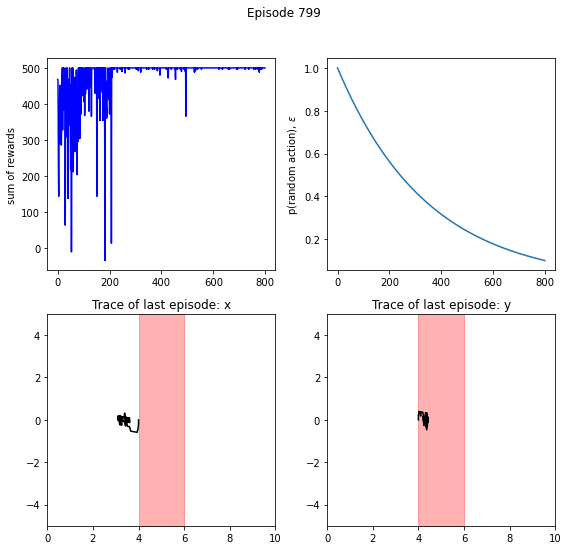

In [95]:
## Parameters
K = 800 
n_actions = 5 
max_steps = 500
gamma = 0.9
verbose = False

epsilon = 1.
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 10
nSamples = 1
nOutputs = 1
nInputs = 6
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

def forward(X):
    X = stdX.standardize(X)
    # TODO: Forward pass 
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):

    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)

    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # TODO: Backward pass - calculate gradients for backpropagation
    dV = rh * X1.T @ ((E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E

    return dV, dW

def epsilon_greedy(e, s, env):
    
    actions = env.get_actions()
    if np.random.rand() < e:
        action = np.ravel(actions[np.random.randint(5)]).tolist()
        return action
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), actions)))
        max_as = np.where(Q == np.max(Q))[0] # index to action value
        action = np.ravel(actions[max_as]).tolist()
        
        return action

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2D()

####################
# Normalize 
stdX = Standardizer(env.get_state_range())

# rewards and step trace
rtrace = []
etrace = [epsilon]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
    env.reset()
    s = env.get_cur_state()
    # selection an action
    a = epsilon_greedy(epsilon, s, env)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.step(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1, env)

        rewards.append(r1)
        trace = np.vstack((trace, s1))

        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one
        dV, dW = backward(error, Z, np.hstack((s, a)))

        # TODO: update weights (V & W) with the computed gradient
        V += dV
        W += dW

        s = s1
        a = a1

    epsilon *= epsilon_decay
    etrace.append(epsilon)

    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)

    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(rtrace, "b-")
        plt.ylabel("sum of rewards")

        fig.add_subplot(222)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")

        # plot traces
        fig.add_subplot(223)
        plt.plot(trace[:, 0], trace[:, 1], "k-")
        plt.fill_between([env.goal[0]-1, env.goal[0]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: x")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
        
        # plot traces
        fig.add_subplot(224)
        plt.plot(trace[:, 2], trace[:, 3], "k-")
        plt.fill_between([env.goal[1]-1, env.goal[1]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: y")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

### 4. Explain your RL Agent

- Decide your TD learning approach: SARSA or Q-learning?

    For this problem, the TD learning approach was chosen to be Q-learning, as this is the method that was used in the class notes which were used to create the majority of the code for this problem. 
    
    
- Describe your function approximator. 
    
    A neural network funciton approximator was used for this problem. As neural networks are universal approximators, this seems to be a good choice for a reinforcement learning problem such as this. With this neural network, we are estimating an unknown underlying function for the problem using observations from the environment. The number of hidden layers in the neural network can be adjusted to find the model that achieves the best results. 
    
    
- Describe your approach and the reason why you select it.

    The main approach to this problem was to follow the class notes as closely as possible in order to achieve a viable solution for this assignment. This approach was selected due to past experience with ITCS 6165 homework assignments. As the majority of time is spent attempting to impliment the necessary code in a way that is compatible with the provided code, it seems best to stick as closely as possible to portions of code that have already been completed in class notes and class assignments. Otherwise, a great deal of time will be lost not only trying to learn how to impliment the necessary code in the personally desired way but also trying to troubleshoot and debug the numerous compatability errors that arise in the process. So, overall, this problem was tackled as a puzzle, using pieces of code from previous assignments, labs, and notes to create a final product. With this method, only minor adjustments needed to be made to the code segments in order to create a functioning environment and agent. 
    
    
- Explain your codes.

    The majority of the RL Agent code for this problem was taken from the class notes. In this code, we use a forward pass method, a backward pass method, and an epsilon greedy method. These methods are each called repetitively as the neural network weights, environment states, actions, and rewards are updated. In addition, the Standardizer class was taken directly from the class notes to be used in this problem. 
    
    First, we define the network structure and the parameters. These can and will be altered during experimentation in order to identify the values that achieve the best performance. Then, we initialize the weights to uniformly distributed values. For each episode, we reset the environment and get the current state which is then passed to the epsilon_greedy method in order to select an action. Once the action is selected, we step the environment and observe the current state to see how the action has changed our environment. We then complete a forward pass to update the netural network. The output of the neural network is the Q value for the next state. A backward pass through the network is then performed to update the gradients in order to adjust the weights. The weights are updated as well as the current state and action. This process is completed for the allotted amount of time steps. 
    
    At the end of this process, the value for epsilon is adjusted and the problem is run through again. This allows us to see how the value of epsilon affects the performance of the agent. Once the minimum value of epsilon has been reached, we continue to the next episode where the entire process begins again. Iterating through the code like this is important as there is a random aspect to the problem. What is achieved in what episode is not likely to be recreated in the next. In addition, it is desired for the agent to continue to learn with each iteration and use the adjusted weights to perform better at each episode, though this may not always be the case depending on the parameters. 

## Gymnasium  

### 3. Build RL Agent Class

In [3]:
# Author: Till Zemann
# License: MIT License

from __future__ import annotations
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
from tqdm import tqdm

import gymnasium as gym


In [4]:
# creating the blackjack environment.
env = gym.make("Blackjack-v1", sab=True)

# reset the environment to get the first observation
done = False
observation, info = env.reset()

In [5]:
class RLAgent2:
    def __init__(
        self,
        learning_rate: float,
        initial_epsilon: float,
        epsilon_decay: float,
        final_epsilon: float,
        discount_factor: float = 0.95,
    ):
        """Initialize a Reinforcement Learning agent with an empty dictionary
        of state-action values (q_values), a learning rate and an epsilon.

        Args:
            learning_rate: The learning rate
            initial_epsilon: The initial epsilon value
            epsilon_decay: The decay for epsilon
            final_epsilon: The final epsilon value
            discount_factor: The discount factor for computing the Q-value
        """
        self.q_values = defaultdict(lambda: np.zeros(env.action_space.n))

        self.lr = learning_rate
        self.discount_factor = discount_factor

        self.epsilon = initial_epsilon
        self.epsilon_decay = epsilon_decay
        self.final_epsilon = final_epsilon

        self.training_error = []

    def get_action(self, obs: tuple[int, int, bool]) -> int:
        """
        Returns the best action with probability (1 - epsilon)
        otherwise a random action with probability epsilon to ensure exploration.
        """
        # with probability epsilon return a random action to explore the environment
        if np.random.random() < self.epsilon:
            return env.action_space.sample()

        # with probability (1 - epsilon) act greedily (exploit)
        else:
            return int(np.argmax(self.q_values[obs]))

    def update(self, obs: tuple[int, int, bool], action: int, reward: float, terminated: bool, 
               next_obs: tuple[int, int, bool]):
        
        """Updates the Q-value of an action."""
        future_q_value = (not terminated) * np.max(self.q_values[next_obs])
        temporal_difference = (reward + self.discount_factor * future_q_value - self.q_values[obs][action])

        self.q_values[obs][action] = (self.q_values[obs][action] + self.lr * temporal_difference)
        self.training_error.append(temporal_difference)

    def decay_epsilon(self):
        self.epsilon = max(self.final_epsilon, self.epsilon - epsilon_decay)

### 4. Explain your RL Agent

The RL Agent used for this problem was adapted from the tutorial code provided by Gymanasium (https://gymnasium.farama.org/tutorials/training_agents/blackjack_tutorial/). This agent uses a tabular funciton approximator to find the best policy for the Blackjack game. This policy is essentially a learned cheat-sheet for the Blackjack game, telling the player (in this case, the agent) which move to make for each case.


- Decide your TD learning approach: SARSA or Q-learning?
    
    The TD learning approach that is used for this agent is Q-learning as that is the method that was used in the tutorial.
  
  
- Describe your function approximator.  

    A tabular function approximator was used for this problem. A tabular function approximator represents a function as a table of values. In this approach, the function is defined by a finite set of input-output pairs, which are stored in a table or matrix.
    
    
- Describe your approach and the reason why you select it.

    The approach for this problem was to follow the provided tutorial in an effort to better understand the process of TD Learning.  This approach was selected due to past experience with ITCS 6165 homework assignments. As the majority of time is spent attempting to impliment the necessary code in a way that is compatible with the provided code, it seems best to stick as closely as possible to portions of code that have already been completed in class notes and class assignments. Otherwise, a great deal of time will be lost not only trying to learn how to impliment the necessary code in the personally desired way but also trying to troubleshoot and debug the numerous compatability errors that arise in the process. So, as the provided tutorial seems to follow the RL Agent structure that is shown in class, this approach seemed to be a great way to complete the assignment in a way that might offer a better understanding of the concept, rather than further confusion wihch is typically the result of completing these assignments. 
    
    
- Explain your codes.

    The agent class contains four methods: init(), get_action(), update(), and decay_epsilon(). The init method simply serves to iniialize the variables that are used throughout the code. The get_action() method returns the best action with probability (1 - epsilon) or a random action with probability epsilon. This is to ensure that the agent explores the environment in order to find the best policy. The update() method updates the q-value of an action. This action is stored in the q-table which holds the policy. 
    
    A simple alteration to the code has been made. Instead of using the epsilon decay function that is provided in the tutorial, the epsilon decay function that was used in the previous problem is implemented here. 

# IV - Results

- Describe the choice of your hyper-parameters for $\gamma$, $\epsilon$, the learning rates $\rho$'s, and etc. 
  - Run experiments to find good hyper-parameters
  - Show the experimental outputs to show the process of your selection
- Visualize the results and explain outputs 
  - Run the codes and tell me what you observe
  - Add more visualizations to enrich your explanation.

## 2D Marble Control

### 5. Discuss Results

Here, we run the Marble2D experiment with a gamma value of 0.5 to see how this affects our results. The number of hidden layers is set to 10 for this experiment and will remain constant as we change the gamma value in order to determine how gamma affects the performance individually. However, we can adjust the number of hidden layers in a layer experiment to determine how this affects the performance of our agent. As we watch the progression of the episodes, we can see how this affects our agent. The performance of the agent can be seen in the x and y trace graphs for each episode.

The learning rate is not adjusted for this problem as gamma essentially acts as the learning rate in this case. More specifically, the epsilon value is associated with how randomly the action is taken. As the learning goes on, epsilon is decayed to stabilize and exploit the learned policy.

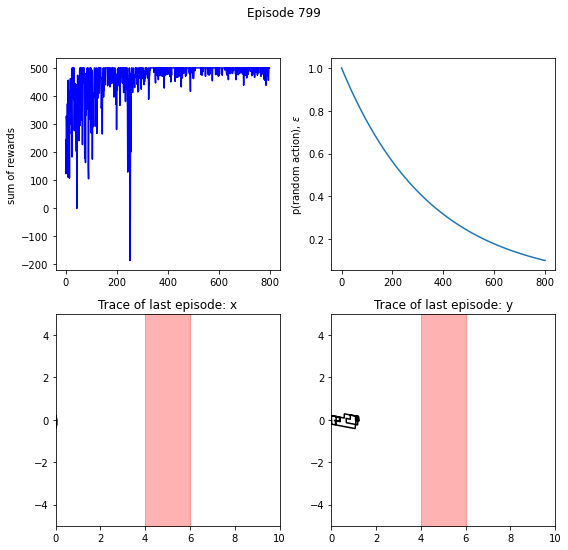

In [96]:
## Parameters
K = 800 
n_actions = 5 
max_steps = 500
gamma = 0.5
verbose = False

epsilon = 1.
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 10
nSamples = 1
nOutputs = 1
nInputs = 6
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

def forward(X):
    X = stdX.standardize(X)
    # TODO: Forward pass 
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):

    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)

    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # TODO: Backward pass - calculate gradients for backpropagation
    dV = rh * X1.T @ ((E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E

    return dV, dW

def epsilon_greedy(e, s, env):
    
    actions = env.get_actions()
    if np.random.rand() < e:
        action = np.ravel(actions[np.random.randint(5)]).tolist()
        return action
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), actions)))
        max_as = np.where(Q == np.max(Q))[0] # index to action value
        action = np.ravel(actions[max_as]).tolist()
        
        return action

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2D()

####################
# Normalize 
stdX = Standardizer(env.get_state_range())

# rewards and step trace
rtrace = []
etrace = [epsilon]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
    env.reset()
    s = env.get_cur_state()
    # selection an action
    a = epsilon_greedy(epsilon, s, env)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.step(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1, env)

        rewards.append(r1)
        trace = np.vstack((trace, s1))

        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one
        dV, dW = backward(error, Z, np.hstack((s, a)))

        # TODO: update weights (V & W) with the computed gradient
        V += dV
        W += dW

        s = s1
        a = a1

    epsilon *= epsilon_decay
    etrace.append(epsilon)

    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)

    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(rtrace, "b-")
        plt.ylabel("sum of rewards")

        fig.add_subplot(222)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")

        # plot traces
        fig.add_subplot(223)
        plt.plot(trace[:, 0], trace[:, 1], "k-")
        plt.fill_between([env.goal[0]-1, env.goal[0]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: x")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
        
        # plot traces
        fig.add_subplot(224)
        plt.plot(trace[:, 2], trace[:, 3], "k-")
        plt.fill_between([env.goal[1]-1, env.goal[1]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: y")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

As seen in the x and y trace graphs, the agent seems to stray further from the goal position as the episodes progress, indicating that the agent is not learning. As this value of gamma was the first to be tested, we will compare the performance in this experiment with that of the next experiment with an adjusted gamma value.

Here, we run the Marble2D experiment with a gamma value of 0.9 to see how this affects our results. The number of hidden layers remains at 10 for this experiment as we change the gamma value in order to determine how gamma affects the performance. As we watch the progression of the episodes, we can see how this affects our agent. The performance of the agent can be seen in the x and y trace graphs for each episode.

The learning rate is not adjusted for this problem as gamma essentially acts as the learning rate in this case. More specifically, the epsilon value is associated with how randomly the action is taken. As the learning goes on, epsilon is decayed to stabilize and exploit the learned policy.

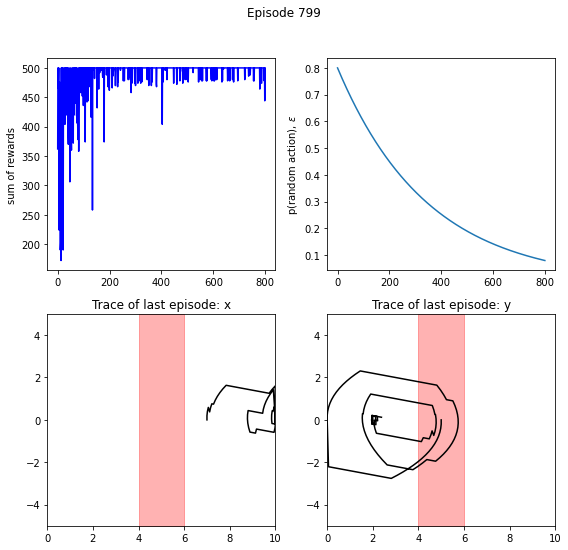

In [97]:
## Parameters
K = 800 
n_actions = 5 
max_steps = 500
gamma = 0.9
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 10
nSamples = 1
nOutputs = 1
nInputs = 6
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

def forward(X):
    X = stdX.standardize(X)
    # TODO: Forward pass 
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):

    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)

    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # TODO: Backward pass - calculate gradients for backpropagation
    dV = rh * X1.T @ ((E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E

    return dV, dW

def epsilon_greedy(e, s, env):
    
    actions = env.get_actions()
    if np.random.rand() < e:
        action = np.ravel(actions[np.random.randint(5)]).tolist()
        return action
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), actions)))
        max_as = np.where(Q == np.max(Q))[0] # index to action value
        action = np.ravel(actions[max_as]).tolist()
        
        return action

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2D()

####################
# Normalize 
stdX = Standardizer(env.get_state_range())

# rewards and step trace
rtrace = []
etrace = [epsilon]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
    env.reset()
    s = env.get_cur_state()
    # selection an action
    a = epsilon_greedy(epsilon, s, env)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.step(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1, env)

        rewards.append(r1)
        trace = np.vstack((trace, s1))

        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one
        dV, dW = backward(error, Z, np.hstack((s, a)))

        # TODO: update weights (V & W) with the computed gradient
        V += dV
        W += dW

        s = s1
        a = a1

    epsilon *= epsilon_decay
    etrace.append(epsilon)

    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)

    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(rtrace, "b-")
        plt.ylabel("sum of rewards")

        fig.add_subplot(222)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")

        # plot traces
        fig.add_subplot(223)
        plt.plot(trace[:, 0], trace[:, 1], "k-")
        plt.fill_between([env.goal[0]-1, env.goal[0]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: x")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
        
        # plot traces
        fig.add_subplot(224)
        plt.plot(trace[:, 2], trace[:, 3], "k-")
        plt.fill_between([env.goal[1]-1, env.goal[1]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: y")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

As seen in the x and y trace graphs, the agent seems to stay closer to the goal position than in the previous experiment, often circling the desired position which indicates that our agent may be starting the learn. This higher value of gamma has seemed to produce slightly better results, as the agent has remained closer to the goal location in the final episode than what was seen in the final episode of the previous experiment. However, neither of the experiments has achieved particularly satisfying or desirable results. 

Here, we run the Marble2D experiment with the same gamma value of 0.9 that seemed to produce better results. The number of hidden layers will be adjusted to 15 for this experiment in order to determine how the hidden layers affect the performance. As we watch the progression of the episodes, we can see how this affects our agent. The performance of the agent can be seen in the x and y trace graphs for each episode.

The learning rate is not adjusted for this problem as gamma essentially acts as the learning rate in this case. More specifically, the epsilon value is associated with how randomly the action is taken. As the learning goes on, epsilon is decayed to stabilize and exploit the learned policy.

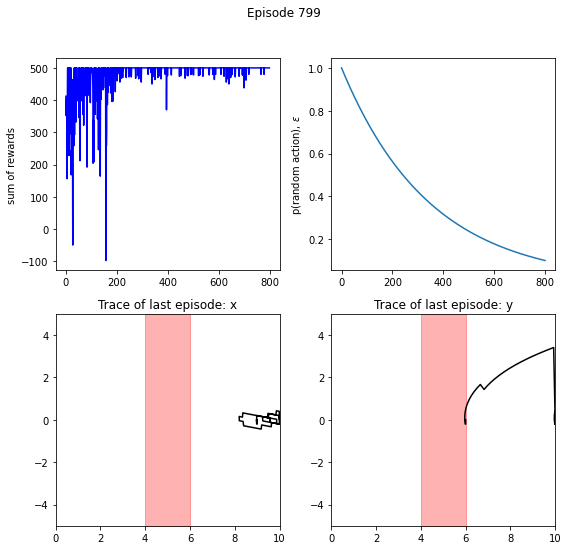

In [3]:
## Parameters
K = 800 
n_actions = 5 
max_steps = 500
gamma = 0.9
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 15
nSamples = 1
nOutputs = 1
nInputs = 6
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

def forward(X):
    X = stdX.standardize(X)
    # TODO: Forward pass 
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):

    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)

    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # TODO: Backward pass - calculate gradients for backpropagation
    dV = rh * X1.T @ ((E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E

    return dV, dW

def epsilon_greedy(e, s, env):
    
    actions = env.get_actions()
    if np.random.rand() < e:
        action = np.ravel(actions[np.random.randint(5)]).tolist()
        return action
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), actions)))
        max_as = np.where(Q == np.max(Q))[0] # index to action value
        action = np.ravel(actions[max_as]).tolist()
        
        return action

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2D()

####################
# Normalize 
stdX = Standardizer(env.get_state_range())

# rewards and step trace
rtrace = []
etrace = [epsilon]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
    env.reset()
    s = env.get_cur_state()
    # selection an action
    a = epsilon_greedy(epsilon, s, env)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.step(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1, env)

        rewards.append(r1)
        trace = np.vstack((trace, s1))

        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one
        dV, dW = backward(error, Z, np.hstack((s, a)))

        # TODO: update weights (V & W) with the computed gradient
        V += dV
        W += dW

        s = s1
        a = a1

    epsilon *= epsilon_decay
    etrace.append(epsilon)

    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)

    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(rtrace, "b-")
        plt.ylabel("sum of rewards")

        fig.add_subplot(222)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")

        # plot traces
        fig.add_subplot(223)
        plt.plot(trace[:, 0], trace[:, 1], "k-")
        plt.fill_between([env.goal[0]-1, env.goal[0]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: x")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
        
        # plot traces
        fig.add_subplot(224)
        plt.plot(trace[:, 2], trace[:, 3], "k-")
        plt.fill_between([env.goal[1]-1, env.goal[1]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: y")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

As seen in the x and y trace graphs, the agent does not seem to stay closer to the goal position than in the previous experiment. In order to better understand how the number of hidden layers affects our agent, we must try another value. 

Here, we run the Marble2D experiment with the same gamma value of 0.9 that seemed to produce better results. The number of hidden layers will be adjusted to 6 for this experiment in order to better understand how the hidden layers affect the performance. As we watch the progression of the episodes, we can see how this affects our agent. The performance of the agent can be seen in the x and y trace graphs for each episode.

The learning rate is not adjusted for this problem as gamma essentially acts as the learning rate in this case. More specifically, the epsilon value is associated with how randomly the action is taken. As the learning goes on, epsilon is decayed to stabilize and exploit the learned policy.

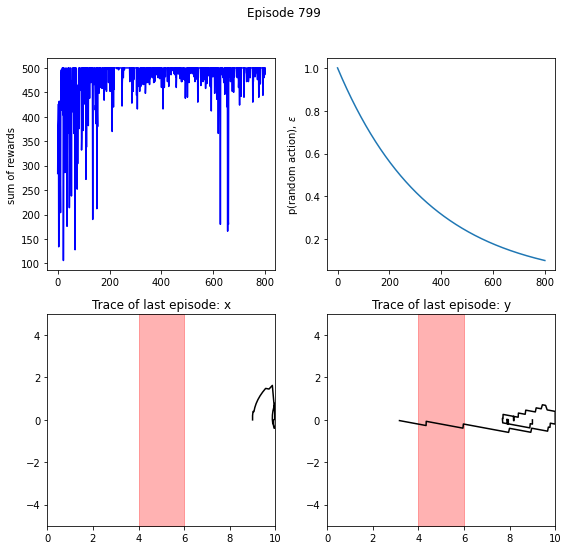

In [6]:
## Parameters
K = 800 
n_actions = 5 
max_steps = 500
gamma = 0.9
verbose = False

epsilon = 1
final_epsilon = 0.1
epsilon_decay =  np.exp(np.log(final_epsilon) / K)

####################
nHiddens = 6
nSamples = 1
nOutputs = 1
nInputs = 6
max_iter = 10

rhoh = rhoo = 0.01

rh = rhoh / (nSamples*nOutputs)
ro = rhoo / (nSamples*nOutputs)

# Initialize weights to uniformly distributed values between small normally-distributed between -0.1 and 0.1
V = 0.1*2*(np.random.uniform(size=(nInputs+1,nHiddens))-0.5)
W = 0.1*2*(np.random.uniform(size=(1+nHiddens,nOutputs))-0.5)

# Add constant column of 1's
def addOnes(A):
    return np.insert(A, 0, 1, axis=len(np.array(A).shape)-1)

def forward(X):
    X = stdX.standardize(X)
    # TODO: Forward pass 
    X1 = addOnes(X)
    Z = np.tanh(X1 @ V)
    Z1 = addOnes(Z)
    Y = Z1 @ W

    return Y, Z

def as_array(A):
    A = np.array(A)
    if len(A.shape) == 1:
        return A.reshape((1, -1))
    return A

def backward(error, Z, X):

    ### make sure the array shapes
    X = as_array(X)
    Z = as_array(Z)
    E = as_array(error)

    Z1 = addOnes(Z)
    X1 = addOnes(X)

    # TODO: Backward pass - calculate gradients for backpropagation
    dV = rh * X1.T @ ((E @ W[1:,:].T) * (1-Z**2))
    dW = ro * Z1.T @ E

    return dV, dW

def epsilon_greedy(e, s, env):
    
    actions = env.get_actions()
    if np.random.rand() < e:
        action = np.ravel(actions[np.random.randint(5)]).tolist()
        return action
    else:
        Q, _ = forward(np.hstack((np.tile(s, (5,1)), actions)))
        max_as = np.where(Q == np.max(Q))[0] # index to action value
        action = np.ravel(actions[max_as]).tolist()
        
        return action

fig = plt.figure(figsize=(8, 8))
####################
# Cart model environment 
env = Marble2D()

####################
# Normalize 
stdX = Standardizer(env.get_state_range())

# rewards and step trace
rtrace = []
etrace = [epsilon]
for j in range(K):

    if verbose: print("\tepisode #", j, "   ",end="")
    env.reset()
    s = env.get_cur_state()
    # selection an action
    a = epsilon_greedy(epsilon, s, env)

    rewards = []
    trace = np.array(s)
    for step in range(max_steps):
        if verbose: print("\tstep #", step, "   ",end="")
        # move
        r1 = env.step(a)
        s1 = env.get_cur_state()
        a1 = epsilon_greedy(epsilon, s1, env)

        rewards.append(r1)
        trace = np.vstack((trace, s1))

        # update neural networks
        Q1, _ = forward(np.hstack((s1, a1)))  # output of neural network is Q for next state
        Q, Z = forward(np.hstack((s, a)))  # output of neural network is Q for next state
        error = r1 + gamma * Q1 - Q  # use action value as index by adding one
        dV, dW = backward(error, Z, np.hstack((s, a)))

        # TODO: update weights (V & W) with the computed gradient
        V += dV
        W += dW

        s = s1
        a = a1

    epsilon *= epsilon_decay
    etrace.append(epsilon)

    if verbose: print("Done (", np.sum(rewards), ")", step)

    rtrace.append(np.sum(rewards))

    last_plot = (j == K-1)

    if j % 10 == 0 or last_plot:
        plt.clf()
        fig.add_subplot(221)
        plt.plot(rtrace, "b-")
        plt.ylabel("sum of rewards")

        fig.add_subplot(222)
        plt.plot(etrace, "-")
        plt.ylabel("p(random action), $\epsilon$")

        # plot traces
        fig.add_subplot(223)
        plt.plot(trace[:, 0], trace[:, 1], "k-")
        plt.fill_between([env.goal[0]-1, env.goal[0]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: x")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
        
        # plot traces
        fig.add_subplot(224)
        plt.plot(trace[:, 2], trace[:, 3], "k-")
        plt.fill_between([env.goal[1]-1, env.goal[1]+1], [-5, -5],[5, 5], color='red', alpha=0.3)
        plt.title("Trace of last episode: y")
        plt.xlim([0, 10])
        plt.ylim([-5, 5])

        plt.suptitle(''.join(["Episode ",str(j)]))
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.draw()

        ipd.clear_output(wait=True)
        ipd.display(fig)
ipd.clear_output(wait=True)

Although none of the experiments resulting in particularly desirable performance, it seems that in this experiment, as the episodes progressed, the agent spent more time in the goal position than in previous experiments. This indicates that a smaller number of hidden layers could be ideal for this problem. However, in the final episode, the agent ends up farther away from the goal than what was achieved when using 10 hidden layers.

Overall, the best performance out of all of the experiments was seen when using a gamma value of 0.9 and 10 hidden layers. However, this did not result in an optimal solution.

## Gymnasium  

### 5. Discuss Results

Here, we run the Blackjack experiment with a learning rate of 0.01 and 100,000 episodes to see how this affects our results. As in the previous problem, the epsilon values are not adjusted in order to focus on the other hyperparameters and how they affect the model.

In [57]:
# creating the blackjack environment.
env = gym.make("Blackjack-v1", sab=True)

# reset the environment to get the first observation
done = False
observation, info = env.reset()

# hyperparameters
learning_rate = 0.01
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = np.exp(np.log(final_epsilon) / n_episodes)  # ALTERED: used epsilon decay from last problem
final_epsilon = 0.1

agent = RLAgent2(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [58]:
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)

for episode in tqdm(range(n_episodes)):
    
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 100000/100000 [00:58<00:00, 1699.29it/s]


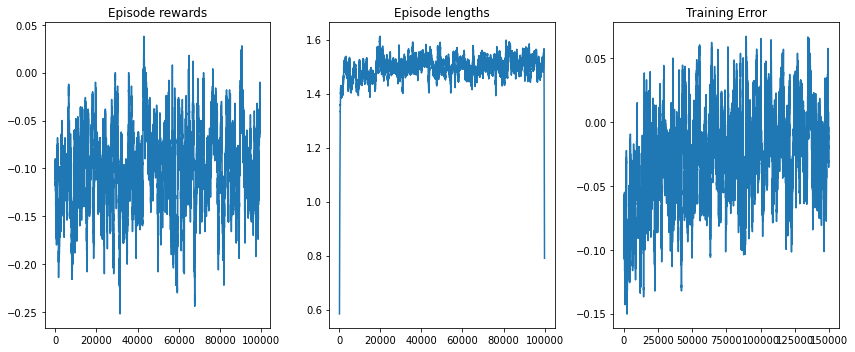

In [59]:
# Plotting episode rewards, episode lengths, and training error
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = ( np.convolve(np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid") 
                         / rolling_length)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)

axs[1].set_title("Episode lengths")
# compute and assign a rolling average of the data to provide a smoother graph
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same")
                        / rolling_length)
axs[1].plot(range(len(length_moving_average)), length_moving_average)

axs[2].set_title("Training Error")
# compute and assign a rolling average of the data to provide a smoother graph
training_error_moving_average = (np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
                                / rolling_length)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)

plt.tight_layout()
plt.show()

As seen in the training error graph, the agent seems to quickly approach zero training error, staying around zero for the majority of the grpah, indicating that the agent is learning. As these values for the learning rate and number of episodes were the first to be tested, we will compare the performance in this experiment with that of the next experiment with adjusted values.

To further understand what our agent is doing here, we can output the final learned policy. The code to do so has been adapted from the tutorial provided by Gymnasium.

In [14]:
# ALTERED: Policy plotting function adapted from plotting functions used in tutorial 
# https://gymnasium.farama.org/tutorials/training_agents/blackjack_tutorial/

def plot_policy(agent, usable_ace=False): 
    
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )
    
    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: without usable ace")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))
    plt.show()
    
    usable_ace = True
    state_value = defaultdict(float)
    policy = defaultdict(int)
    for obs, action_values in agent.q_values.items():
        state_value[obs] = float(np.max(action_values))
        policy[obs] = int(np.argmax(action_values))

    player_count, dealer_count = np.meshgrid(
        # players count, dealers face-up card
        np.arange(12, 22),
        np.arange(1, 11),
    )
    
    # create the policy grid for plotting
    policy_grid = np.apply_along_axis(
        lambda obs: policy[(obs[0], obs[1], usable_ace)],
        axis=2,
        arr=np.dstack([player_count, dealer_count]),
    )

    # plot the policy
    fig.add_subplot(1, 2, 2)
    ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
    ax2.set_title(f"Policy: with usable ace")
    ax2.set_xlabel("Player sum")
    ax2.set_ylabel("Dealer showing")
    ax2.set_xticklabels(range(12, 22))
    ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

    # add a legend
    legend_elements = [
        Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
        Patch(facecolor="grey", edgecolor="black", label="Stick"),
    ]
    ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

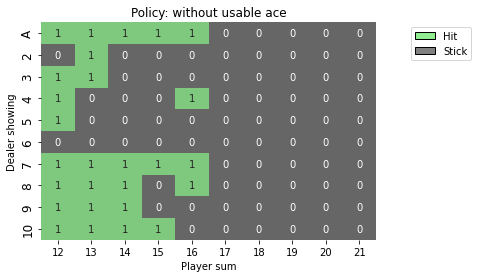

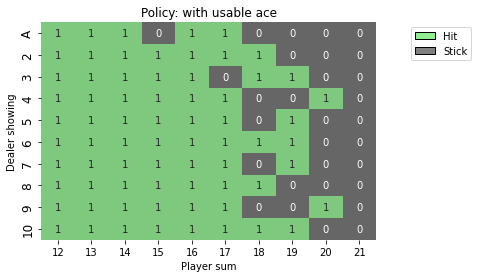

In [61]:
plot_policy(agent, usable_ace=False)
plt.show()

In these graphs, we can see the policy that has been created in the learning process. Each move that should/would be made for each possible case within the game has been marked in these graphs. Let's see how this changes if we increase the learning rate. 

In [16]:
# creating the blackjack environment.
env = gym.make("Blackjack-v1", sab=True)

# reset the environment to get the first observation
done = False
observation, info = env.reset()

# hyperparameters
learning_rate = 0.1
n_episodes = 100_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = RLAgent2(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [17]:
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 100000/100000 [01:07<00:00, 1484.09it/s]


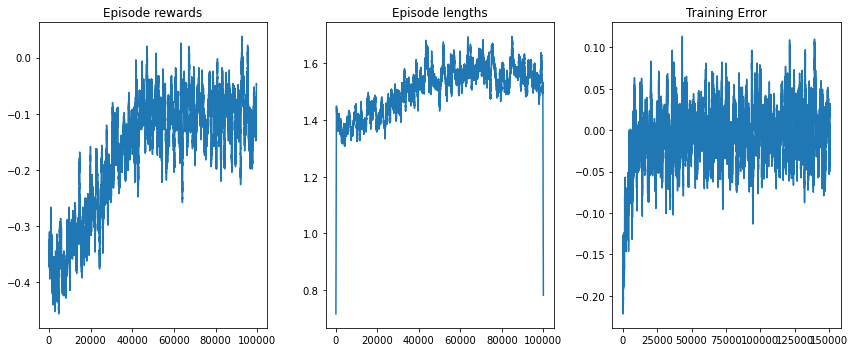

In [18]:
# Plotting episode rewards, episode lengths, and training error
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = ( np.convolve(np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid") 
                         / rolling_length)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)

axs[1].set_title("Episode lengths")
# compute and assign a rolling average of the data to provide a smoother graph
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same")
                        / rolling_length)
axs[1].plot(range(len(length_moving_average)), length_moving_average)

axs[2].set_title("Training Error")
# compute and assign a rolling average of the data to provide a smoother graph
training_error_moving_average = (np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
                                / rolling_length)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)

plt.tight_layout()
plt.show()

We can see a major difference in the graph for episode rewards. The values remain much lower throughout the entire training process, implying that the agent is not playin the game well which indicates that the agent is not learning. As expected, a higher learning rate does not seem to help the agent learn. Lets see what the policy looks like.  

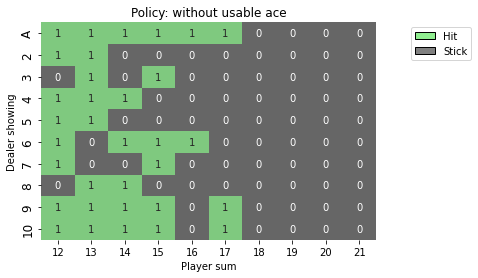

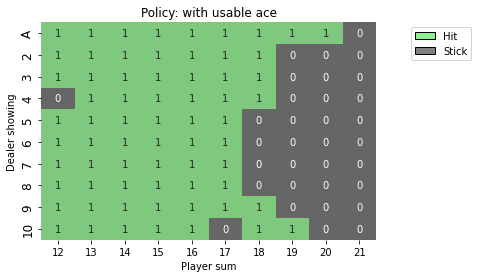

In [19]:
plot_policy(agent, usable_ace=False)
plt.show()

This policy does not seem all too different from the policy created in the last experiment, though there are some visible differences. It would be hard to tell purely from the policy graph whether the agent has learned to play the game well. However, by comparing the reward and error graphs, it seems clear that this experiment did not produce a better policy than what was produced in the previous experiment. 

According to the tutuorial, a learning rate of 0.001 with 1,000,000 episodes should produce the optimal solution. For the next experiment, we will try these values and see how this affects our results.

In [9]:
# creating the blackjack environment.
env = gym.make("Blackjack-v1", sab=True)

# reset the environment to get the first observation
done = False
observation, info = env.reset()

# hyperparameters
learning_rate = 0.001
n_episodes = 1_000_000
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

agent = RLAgent2(
    learning_rate=learning_rate,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

In [10]:
env = gym.wrappers.RecordEpisodeStatistics(env, deque_size=n_episodes)
for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False

    # play one episode
    while not done:
        action = agent.get_action(obs)
        next_obs, reward, terminated, truncated, info = env.step(action)

        # update the agent
        agent.update(obs, action, reward, terminated, next_obs)

        # update if the environment is done and the current obs
        done = terminated or truncated
        obs = next_obs

    agent.decay_epsilon()

100%|██████████| 1000000/1000000 [11:05<00:00, 1502.13it/s]


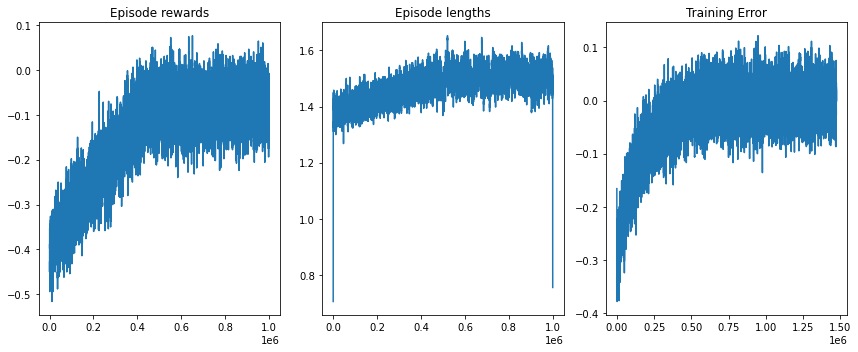

In [12]:
# Plotting episode rewards, episode lengths, and training error
rolling_length = 500
fig, axs = plt.subplots(ncols=3, figsize=(12, 5))

axs[0].set_title("Episode rewards")
# compute and assign a rolling average of the data to provide a smoother graph
reward_moving_average = ( np.convolve(np.array(env.return_queue).flatten(), np.ones(rolling_length), mode="valid") 
                         / rolling_length)
axs[0].plot(range(len(reward_moving_average)), reward_moving_average)

axs[1].set_title("Episode lengths")
# compute and assign a rolling average of the data to provide a smoother graph
length_moving_average = (np.convolve(np.array(env.length_queue).flatten(), np.ones(rolling_length), mode="same")
                        / rolling_length)
axs[1].plot(range(len(length_moving_average)), length_moving_average)

axs[2].set_title("Training Error")
# compute and assign a rolling average of the data to provide a smoother graph
training_error_moving_average = (np.convolve(np.array(agent.training_error), np.ones(rolling_length), mode="same")
                                / rolling_length)
axs[2].plot(range(len(training_error_moving_average)), training_error_moving_average)

plt.tight_layout()
plt.show()

In the rewards graph we can see the rewards steadily climb from episode to episode. This could indicate that the agent is learning and slowly improving its gameplay to consistently achieve higher rewards. This same trend is seen in the error grpah. Though there is some training error in the beginning episodes, the agent seems to learn as the episodes progress and levels off the error around zero. Let's see what the suppossdly optimal policy looks like.

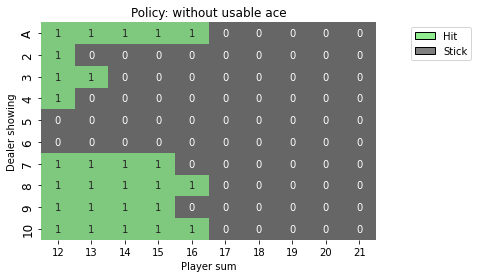

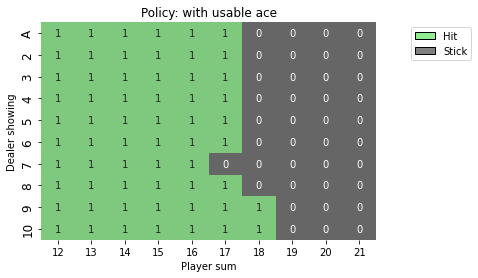

In [15]:
plot_policy(agent, usable_ace=False)
plt.show()

This policy seems much less scattered than the policies produced from the previous experiments. It is likely that this is the optimal solution for this problem. However, as there have been some slight modifications from the code provided in the tutorial, we cannot be certain that the provided values for an optimal solution will still produce the optimal results. 

# V. Conclusions

The major challenge in this assignment was dealing with class structures. Although classes seem simple when viewing finished code, it is much more confusing to build these class structures for different cases. It is clear that I should do more research on designing class structures in order to better understand how to complete the Marble2D problem. Other than that, this homework assignment was thankfully more simple to complete due to the access to helpful code segments. 

# Extra Credit 

There are two potential extra credit opportunities in this assignment. As of the randomness and potential computation time for exploration of RL agent, you may not achieve optimal solutions for both environments. Therefore, one extra credit can be given when you have reached the optimal solutions for both environments. 

1. You will be qualified to earn an extra credit when you **solve both problems successfully** with **complete experimental results and discussions**, following the bullets in results section for both. 

2. Iterate your Gymnasium solution replacing the function approximator with a neural network. If you want, you are OK to change the environment. 

## Grading

For this assignment, the grading rubric is a bit different. Please check it carefully. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
25 | Problems | 
 |10| 2D Marble Class
 | 5| Explanation of problem and class implementation
 | 5| Explanation of chosen Gymnasium problem
 | 5| explanation of the codes to use YourEnv-v? from Gymnasium
25 | Methods | 
 |10| RLAgent1 for the first problem
 | 5| Explanation of the RLAgent1
 | 5| RLAgent2 for the first problem
 | 5| Explanation of the RLAgent2
40 | Results 
 | 5| Reports the selected parameters 
 |10| Experimental outputs that show the choice of parameters. How do you choose them?
 | 5| Visualization of learning and learned agent
 |10| Observations and analysis of learning results and plots
 |10| Results analysis (following the above four rubric criteria) for the second problem
5 | Conclusions 
